In [10]:
from __future__ import division
from __future__ import print_function
import os
import sys
from time import time
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import matplotlib.font_manager
import pandas as pd
import seaborn as sns
from scipy.spatial.distance import pdist
from math import ceil
from pandas import Series
# Import all models

from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.mcd import MCD
from pyod.models.ocsvm import OCSVM
from pyod.models.pca import PCA

import warnings
warnings.filterwarnings("ignore")

**对所有csv进行测试，这里对算法的拟合用的是全体数据，并未分训练和测试数据，因为分了的话性能实在一般，计算并保存每个csv个各种算法的AUC值**

In [14]:
from sklearn.metrics import roc_curve, auc
algorithm_list=pd.DataFrame(columns=['CBLOF' ,'FB','HBOS','IF','AVG_KNN','Loc KNN','LOF','MCD','OCSVM','PCA'])
temp=0
index=[]
anormal=[]
random_state = np.random.RandomState(42)
#for file in os.listdir("Outlier_wine/benchmarks"):
for file in os.listdir("Outlier_wine/benchmarks/"):
    #file="Outlier_wine/benchmarks/"+file
    index.append(file)   
    file="Outlier_wine/benchmarks/"+file
    wine_df=pd.read_csv(file,encoding="utf-8")
    gt=wine_df["ground.truth"]
    count = gt.value_counts()
    outliers_fraction=count[1]/(count[0]+count[1])
    gt=wine_df[["ground.truth"]]
    
   

    # Define nine outlier detection tools to be compared
    classifiers = {
        'Cluster-based Local Outlier Factor (CBLOF)':
            CBLOF(contamination=outliers_fraction,
                  check_estimator=False, random_state=random_state),
            'Feature Bagging':
            FeatureBagging(LOF(n_neighbors=35),
                           contamination=outliers_fraction,
                           random_state=random_state),
        'Histogram-base Outlier Detection (HBOS)': HBOS(
            contamination=outliers_fraction),
        'Isolation Forest': IForest(contamination=outliers_fraction,
                                    random_state=random_state),
        'K Nearest Neighbors (KNN)': KNN(
            contamination=outliers_fraction),
        'Average KNN': KNN(method='mean',
                           contamination=outliers_fraction),
        'Local Outlier Factor (LOF)':
            LOF(n_neighbors=35, contamination=outliers_fraction),
        'Minimum Covariance Determinant (MCD)': MCD(
            contamination=outliers_fraction, random_state=random_state),
        'One-class SVM (OCSVM)': OCSVM(contamination=outliers_fraction),
        'Principal Component Analysis (PCA)': PCA(
            contamination=outliers_fraction, random_state=random_state),

    }
    wine_data1=wine_df.iloc[:,[4]]
    wine_data2=wine_df.iloc[:,6:17]
    wine_data=wine_data1.join(wine_data2)
    gt.loc[gt["ground.truth"]=="nominal"]=0
    gt.loc[gt["ground.truth"]=="anomaly"]=1
    wine_data=wine_data.values
   
    
    df_array=[]
    # Define nine outlier detection tools to be compared
    for i, (clf_name, clf) in enumerate(classifiers.items()):
   
        # fit the data and tag outliers
        clf.fit(wine_data)
        scores_pred = clf.decision_function(wine_data) * -1
        y_pred = clf.predict(wine_data)
        n_inliers = len(y_pred) - np.count_nonzero(y_pred)
        n_outliers = np.count_nonzero(y_pred == 1)
        threshold = percentile(scores_pred, 100 * outliers_fraction)
        n_errors = (y_pred.flatten() != gt.values.flatten()).sum()
        # plot the levels lines and the points
        fpr, tpr, threshold = roc_curve(y_pred, gt.values.flatten())  ###计算真正率和假正率
        roc_auc = auc(fpr, tpr)  ###计算auc的值
        df_array.append(roc_auc)
        lw = 2


    algorithm_list.loc[temp]=df_array
    temp+=1
    print("第"+str(temp)+"次结束")

第1次结束
第2次结束
第3次结束
第4次结束
第5次结束
第6次结束
第7次结束
第8次结束
第9次结束
第10次结束
第11次结束
第12次结束
第13次结束
第14次结束
第15次结束
第16次结束
第17次结束
第18次结束
第19次结束
第20次结束
第21次结束
第22次结束
第23次结束
第24次结束
第25次结束
第26次结束
第27次结束
第28次结束
第29次结束
第30次结束
第31次结束
第32次结束
第33次结束
第34次结束
第35次结束
第36次结束
第37次结束
第38次结束
第39次结束
第40次结束
第41次结束
第42次结束
第43次结束
第44次结束
第45次结束
第46次结束
第47次结束
第48次结束
第49次结束
第50次结束
第51次结束
第52次结束
第53次结束
第54次结束
第55次结束
第56次结束
第57次结束
第58次结束
第59次结束
第60次结束
第61次结束
第62次结束
第63次结束
第64次结束
第65次结束
第66次结束
第67次结束
第68次结束
第69次结束
第70次结束
第71次结束
第72次结束
第73次结束
第74次结束
第75次结束
第76次结束
第77次结束
第78次结束
第79次结束
第80次结束
第81次结束
第82次结束
第83次结束
第84次结束
第85次结束
第86次结束
第87次结束
第88次结束
第89次结束
第90次结束
第91次结束
第92次结束
第93次结束
第94次结束
第95次结束
第96次结束
第97次结束
第98次结束
第99次结束
第100次结束
第101次结束
第102次结束
第103次结束
第104次结束
第105次结束
第106次结束
第107次结束
第108次结束
第109次结束
第110次结束
第111次结束
第112次结束
第113次结束
第114次结束
第115次结束
第116次结束
第117次结束
第118次结束
第119次结束
第120次结束
第121次结束
第122次结束
第123次结束
第124次结束
第125次结束
第126次结束
第127次结束
第128次结束
第129次结束
第130次结束
第131次结束
第132次结束
第133次结束
第134次结束
第135次结束
第136次结束
第137次结束
第138次结束
第139

第1035次结束
第1036次结束
第1037次结束
第1038次结束
第1039次结束
第1040次结束
第1041次结束
第1042次结束
第1043次结束
第1044次结束
第1045次结束
第1046次结束
第1047次结束
第1048次结束
第1049次结束
第1050次结束
第1051次结束
第1052次结束
第1053次结束
第1054次结束
第1055次结束
第1056次结束
第1057次结束
第1058次结束
第1059次结束
第1060次结束
第1061次结束
第1062次结束
第1063次结束
第1064次结束
第1065次结束
第1066次结束
第1067次结束
第1068次结束
第1069次结束
第1070次结束
第1071次结束
第1072次结束
第1073次结束
第1074次结束
第1075次结束
第1076次结束
第1077次结束
第1078次结束
第1079次结束
第1080次结束
第1081次结束
第1082次结束
第1083次结束
第1084次结束
第1085次结束
第1086次结束
第1087次结束
第1088次结束
第1089次结束
第1090次结束
第1091次结束
第1092次结束
第1093次结束
第1094次结束
第1095次结束
第1096次结束
第1097次结束
第1098次结束
第1099次结束
第1100次结束
第1101次结束
第1102次结束
第1103次结束
第1104次结束
第1105次结束
第1106次结束
第1107次结束
第1108次结束
第1109次结束
第1110次结束
第1111次结束
第1112次结束
第1113次结束
第1114次结束
第1115次结束
第1116次结束
第1117次结束
第1118次结束
第1119次结束
第1120次结束
第1121次结束
第1122次结束
第1123次结束
第1124次结束
第1125次结束
第1126次结束
第1127次结束
第1128次结束
第1129次结束
第1130次结束
第1131次结束
第1132次结束
第1133次结束
第1134次结束
第1135次结束
第1136次结束
第1137次结束
第1138次结束
第1139次结束
第1140次结束
第1141次结束
第1142次结束
第1143次结束
第1144次结束
第1145次结束
第

**该数据集以1680结尾，但其实只有1210行csv文件，将其AUC值记录并保存，下面为记录的一些结果**

In [17]:
algorithm_list.index=[index]
algorithm_list.tail()

,CBLOF,FB,HBOS,IF,AVG_KNN,Loc KNN,LOF,MCD,OCSVM,PCA
wine_benchmark_1676.csv,0.510774,0.521789,0.536225,0.520672,0.523325,0.528658,0.518840,0.540467,0.509360,0.526327
wine_benchmark_1677.csv,0.518219,0.525478,0.519641,0.531010,0.548643,0.571511,0.527603,0.535274,0.511113,0.526746
wine_benchmark_1678.csv,0.514672,0.512068,0.511859,0.530146,0.539028,0.547125,0.520383,0.517486,0.504825,0.520299
wine_benchmark_1679.csv,0.509565,0.529158,0.523540,0.520712,0.533955,0.553235,0.523595,0.532023,0.512230,0.530609
wine_benchmark_1680.csv,0.522578,0.528827,0.519736,0.518315,0.543012,0.561091,0.522784,0.539629,0.514053,0.522578


In [18]:
algorithm_list.to_csv("wine_1680.csv",header=True,index=True)

In [19]:
algorithm_list.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1210 entries, wine_benchmark_0001.csv to wine_benchmark_1680.csv
Data columns (total 10 columns):
CBLOF      1210 non-null float64
FB         1210 non-null float64
HBOS       1210 non-null float64
IF         1210 non-null float64
AVG_KNN    1210 non-null float64
Loc KNN    1209 non-null float64
LOF        1210 non-null float64
MCD        1210 non-null float64
OCSVM      1210 non-null float64
PCA        1210 non-null float64
dtypes: float64(10)
memory usage: 104.0+ KB


In [124]:
import pandas as pd
auc_data=pd.read_csv("wine_1680.csv",encoding="utf-8")
auc_data.head()

,Unnamed: 0,CBLOF,FB,HBOS,IF,AVG_KNN,Loc KNN,LOF,MCD,OCSVM,PCA
0,wine_benchmark_0001.csv,0.555909,0.548489,0.597506,0.565869,0.546237,0.559305,0.540065,0.611319,0.534818,0.562585
1,wine_benchmark_0002.csv,0.559406,0.542477,0.586163,0.562974,0.548874,0.564746,0.543084,0.604595,0.526704,0.551082
2,wine_benchmark_0003.csv,0.552943,0.556462,0.588497,0.538371,0.555441,0.556471,0.548718,0.603069,0.537205,0.551777
3,wine_benchmark_0004.csv,0.550660,0.552422,0.601485,0.577228,0.539572,0.549616,0.542475,0.615924,0.537376,0.561056
4,wine_benchmark_0005.csv,0.556495,0.548940,0.593405,0.554380,0.558936,0.568746,0.550752,0.613910,0.540676,0.568212


**对这些算法进行一个初略的可视化来确定其分布**

In [125]:
import matplotlib.pyplot as plt
def HistDraw(i,auc_data_g,name):

    auc_data_g=auc_data[[name]]
    auc_data_g.hist(bins=30,alpha = 0.8) 
    plt.xlabel('Values of AUC')
    plt.ylabel('Frequency')
    plt.show()

['Unnamed: 0', 'CBLOF', 'FB', 'HBOS', 'IF', 'AVG_KNN', 'Loc KNN', 'LOF', 'MCD', 'OCSVM', 'PCA']
-----------------------------------------各算法整体CSV上性能的直方图表示如下--------------------------------------------


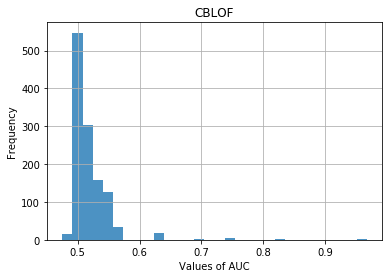

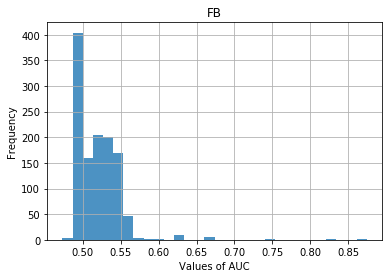

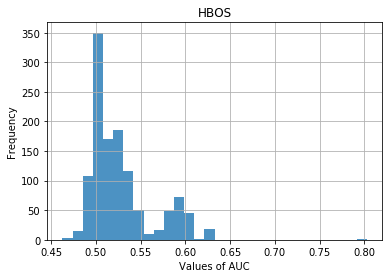

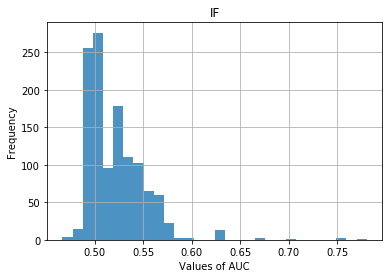

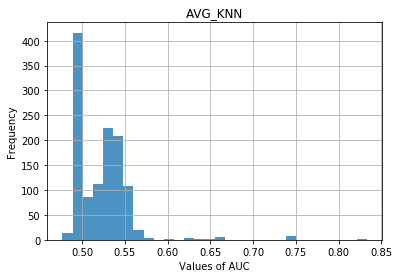

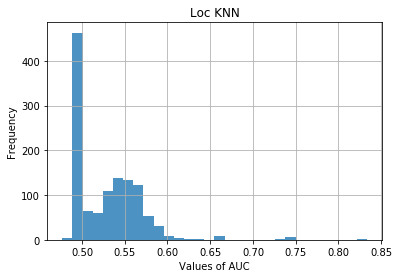

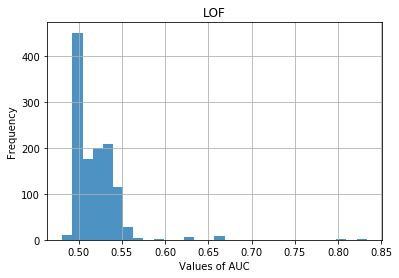

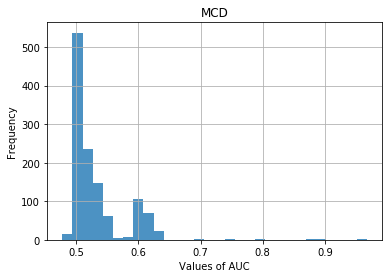

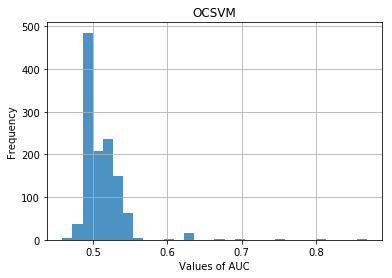

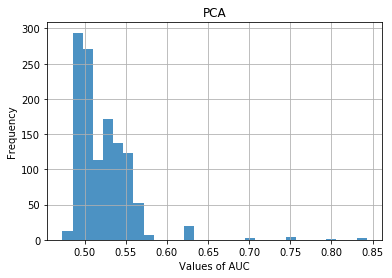

In [126]:
auc_array=auc_data.columns.values.tolist()
print(auc_array)
print("-----------------------------------------各算法整体CSV上性能的直方图表示如下--------------------------------------------")
for i in range(1,len(auc_array)):
    HistDraw(i,auc_data[auc_array[i]],auc_array[i])



**从以上可视化后的结果可以看出大部分算法的AUC值都集中在0.5~0.55中，整体表现最好的算法为MCD算法，存在一部分在0.6~0.7，且随着数据集异常点的变化，每一种算法在某些csv上都存在AUC在[0.7,1]之间，预测的比较准确，所以也验证了之前的猜想，算法的性能在检测异常点中固然重要，但良好标记的数据集也同样非常重要。**